# TACHE 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

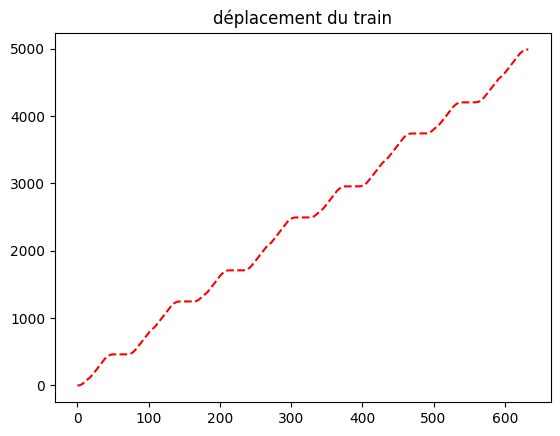

In [2]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('marche.txt')


x = data[:, 0]
y = data[:, 1]
plt.figure()
plt.title("déplacement du train")
plt.plot(x,y,'r--')
plt.show()

- Puissance mécanique a fournir

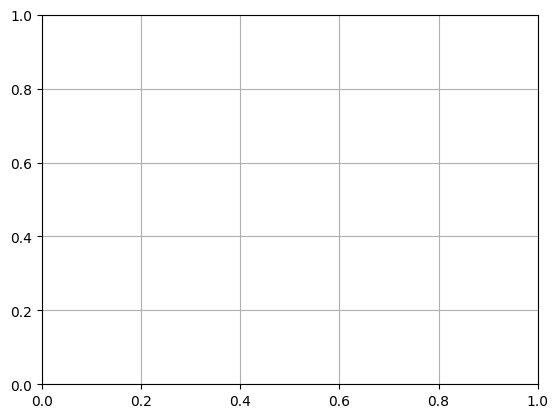

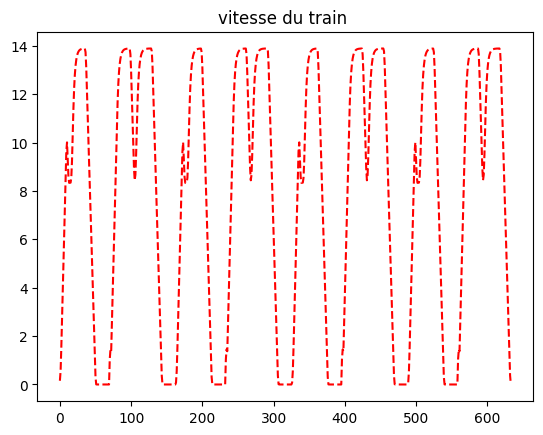

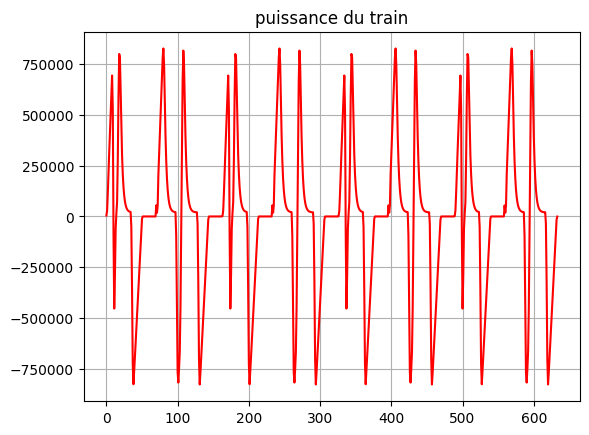

In [3]:
A0,A1=780,6.4/1e3
B0,B1=0,0.14/1e3
C0,C1=0.3634,0
M=70*1e3 #tonnes
V=np.gradient(y, x)
accel=np.gradient(V,x)
plt.grid()
plt.figure()
plt.title("vitesse du train ")
plt.plot(V,'r--')
Fres=(A0+A1*M)+(B0+B1*M)*V+(C0+C1*M)*V**2
Fmot=M*accel+Fres
Pmec=Fmot*V
plt.figure()
plt.title("puissance du train")
plt.grid()
#plt.xlim([0,100])
plt.plot(Pmec,'r')

- Tension du train

In [9]:
import math

Vsst = 790
Rsst = 33 * 1e-3
rho_LAC = 131 * 1e-6
rho_rail = 18 * 1e-6

L = y[-1]

R_LAC1 = rho_LAC * y
R_LAC2 = rho_LAC * (L - y)
R_rail1 = rho_rail * y
R_rail2 = rho_rail * (L - y)

Req1 = Rsst + R_LAC1 + R_rail1
Req2 = Rsst + R_LAC2 + R_rail2
Req_total = Req1*Req2/(Req1+Req2)


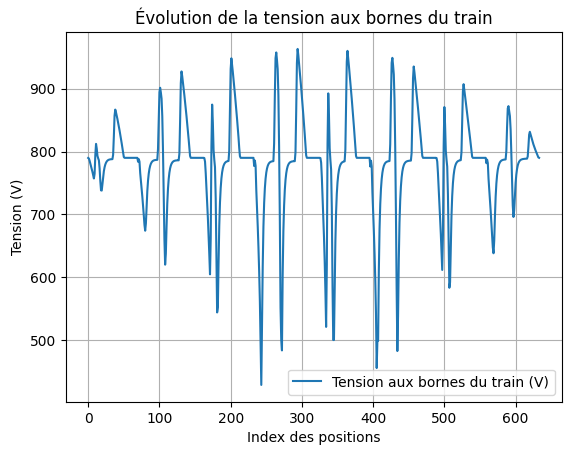

In [10]:
Vtrain = []
for r, p in zip(Req_total, Pmec):
    discriminant = Vsst**2 - 4 * r * p
    if discriminant >= 0:  
        V = 0.5 * (Vsst + math.sqrt(discriminant))
    else:
        V = 500  
    Vtrain.append(V)


Vtrain = np.array(Vtrain)

# Tracé de la courbe
plt.plot(Vtrain, label="Tension aux bornes du train (V)")
plt.xlabel("Index des positions")
plt.grid()
plt.ylabel("Tension (V)")
plt.title("Évolution de la tension aux bornes du train")
plt.legend()

plt.show()

# courant consommé par le train 


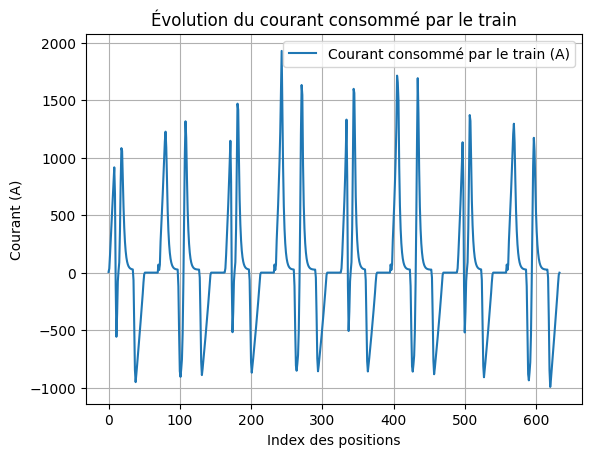

In [ ]:
Itrain = Pmec / Vtrain
plt.plot(Itrain, label="Courant consommé par le train (A)")
plt.xlabel("Index des positions")
plt.ylabel("Courant (A)")
plt.title("Évolution du courant consommé par le train")
plt.legend()
plt.grid()
plt.show()


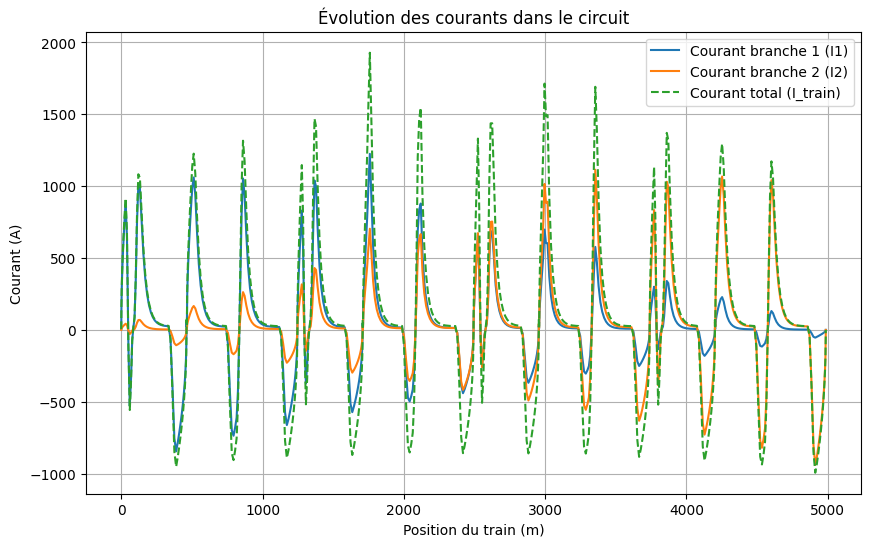

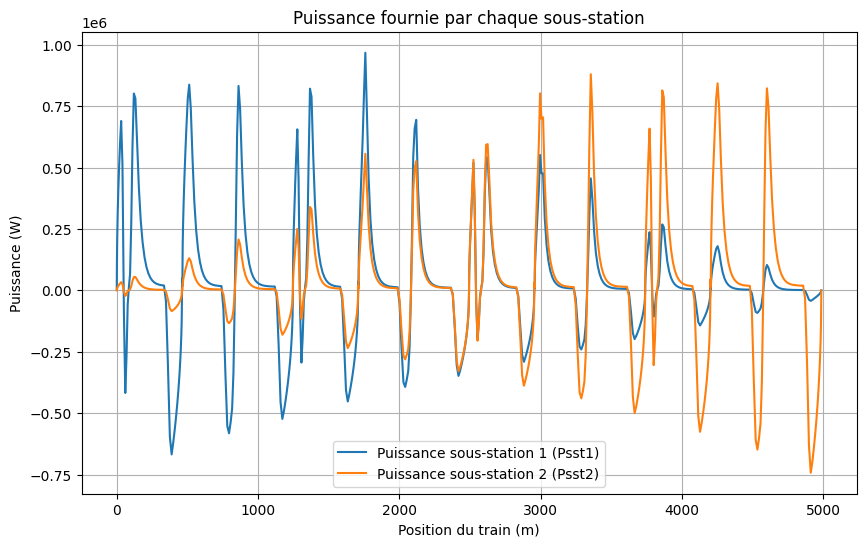

In [ ]:


Vsst = 790
Rsst = 33 * 1e-3
rho_LAC = 131 * 1e-6
rho_rail = 18 * 1e-6

L = y[-1]

R_LAC1 = rho_LAC * y
R_LAC2 = rho_LAC * (L - y)
R_rail1 = rho_rail * y
R_rail2 = rho_rail * (L - y)

Req1 = Rsst + R_LAC1 + R_rail1
Req2 = Rsst + R_LAC2 + R_rail2

Req_total = Req1*Req2/(Req1+Req2)

I_train = (Vsst-Vtrain)/ Req_total
I1 = (Vsst-Vtrain) / Req1
I2 = (Vsst-Vtrain) / Req2



Psst1 = Vsst * I1
Psst2 = Vsst * I2

plt.figure(figsize=(10, 6))
plt.plot(y, I1, label="Courant branche 1 (I1)", linewidth=1.5)
plt.plot(y, I2, label="Courant branche 2 (I2)", linewidth=1.5)
plt.plot(y, I_train, label="Courant total (I_train)", linestyle='--', linewidth=1.5)
plt.xlabel("Position du train (m)")
plt.ylabel("Courant (A)")
plt.title("Évolution des courants dans le circuit")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y, Psst1, label="Puissance sous-station 1 (Psst1)", linewidth=1.5)
plt.plot(y, Psst2, label="Puissance sous-station 2 (Psst2)", linewidth=1.5)
plt.xlabel("Position du train (m)")
plt.ylabel("Puissance (W)")
plt.title("Puissance fournie par chaque sous-station")
plt.legend()
plt.grid()
plt.show()


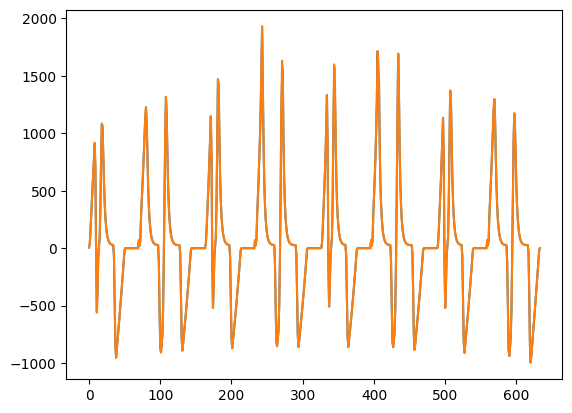

In [ ]:
plt.plot(I1+I2)
plt.plot(Itrain)

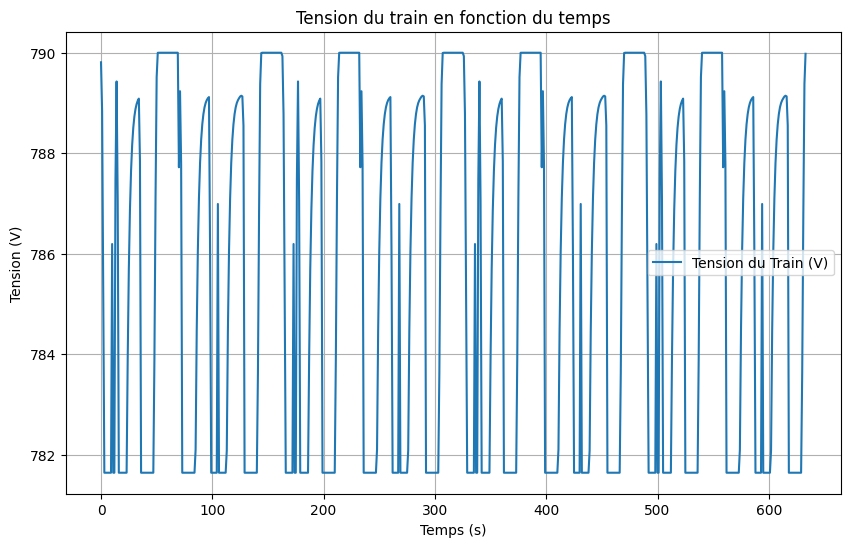

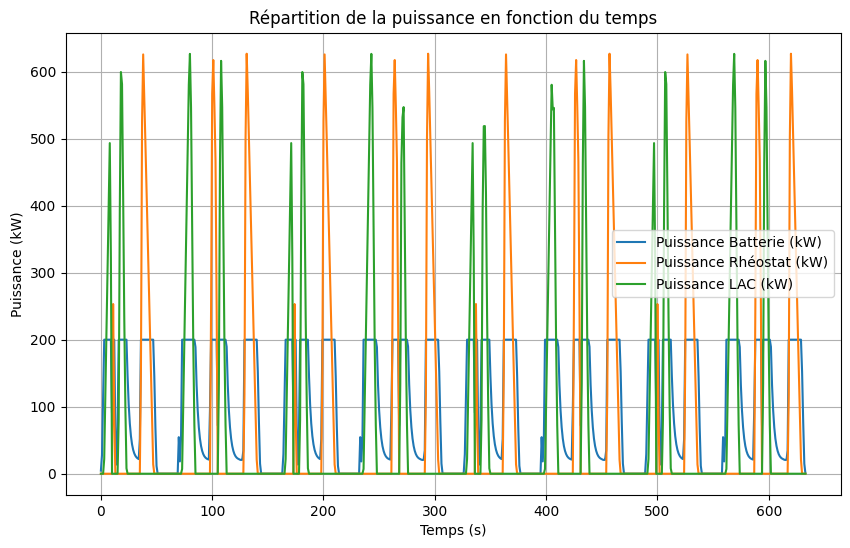

In [ ]:
# Initialisation des paramètres
V_nominal = 790  # Tension nominale (V)
R_internal = 0.033  # Résistance interne batterie (ohms)

E_battery = 100  # Capacité initiale de la batterie (kWh)
P_max_battery = 200e3  # Puissance max de la batterie (W)
P_train=Vtrain*I_train
# Simulation de la batterie
position=y
time=x
#velocity = np.gradient(y, time)  # Vitesse (m/s)
#acceleration = np.gradient(velocity, time)  # Accélération (m/s^2)


# Initialisation des variables
P_battery = np.zeros_like(P_train)
P_rheostat = np.zeros_like(P_train)
P_LAC = np.zeros_like(P_train)
E_battery_history = [E_battery]
V_train = np.zeros_like(P_train)

for i in range(len(P_train)):
    if P_train[i] > 0:  # Phase de traction
        if E_battery > 0:  # Batterie peut fournir de l'énergie
            P_battery[i] = min(P_max_battery, P_train[i])
        P_LAC[i] = P_train[i] - P_battery[i]
    else:  # Phase de freinage
        P_battery[i] = min(P_max_battery, -P_train[i])
        if E_battery >= 100:  # Batterie pleine
            P_rheostat[i] = -P_train[i] - P_battery[i]
    
    # Mise à jour de l'énergie de la batterie
    E_battery += P_battery[i] * (time[1] - time[0]) / 3600  # kWh
    E_battery_history.append(E_battery)
    
    # Calcul de la tension du train
    V_train[i] = V_nominal - R_internal * P_battery[i] / V_nominal

# Résultats et visualisation
plt.figure(figsize=(10, 6))
plt.plot(time, V_train, label="Tension du Train (V)")
plt.xlabel("Temps (s)")
plt.ylabel("Tension (V)")
plt.title("Tension du train en fonction du temps")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time, P_battery / 1e3, label="Puissance Batterie (kW)")
plt.plot(time, P_rheostat / 1e3, label="Puissance Rhéostat (kW)")
plt.plot(time, P_LAC / 1e3, label="Puissance LAC (kW)")
plt.xlabel("Temps (s)")
plt.ylabel("Puissance (kW)")
plt.title("Répartition de la puissance en fonction du temps")
plt.legend()
plt.grid(True)
plt.show()
